In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"Dataset_Penjualan.csv")

df.head()

,Order_ID,Tanggal,Produk,Kategori,Harga,Jumlah,Kota,Metode_Pembayaran,Rating,Total
0,ORD1860,2024-07-24,Monitor,Perangkat Jaringan,7127936,6,Surabaya,Kartu Kredit,1,42767616
1,ORD2294,2024-09-02,Headset,Aksesoris,3037721,3,Bekasi,COD,2,9113163
2,ORD2130,2023-08-31,Spiker,Elektronik,13317966,9,Yogyakarta,Kartu Kredit,3,119861694
3,ORD2095,2024-07-14,Keybord,Elektronik,5673020,6,Bandung,COD,2,34038120
4,ORD2638,2025-08-17,Flashdisk,Aksesoris,12994549,1,Bandung,Transfer Bank,5,12994549


In [2]:
df = df.sort_values(by=["Tanggal"], ascending=True)

df.head(10)

,Order_ID,Tanggal,Produk,Kategori,Harga,Jumlah,Kota,Metode_Pembayaran,Rating,Total
361,ORD1980,2023-01-01,Mouse,Perangkat Jaringan,7195173,8,Depok,Transfer Bank,3,57561384
164,ORD2597,2023-01-01,Laptop,Elektronik,7289122,2,Depok,Transfer Bank,4,14578244
663,ORD2996,2023-01-01,Mouse,Elektronik,5515179,7,Bekasi,COD,2,38606253
1772,ORD1083,2023-01-03,Printer,Perangkat Jaringan,13884564,0,Jakarta,COD,3,0
995,ORD2629,2023-01-03,Router,Elektronik,704143,3,Bekasi,Transfer Bank,1,2112429
2882,ORD2956,2023-01-04,Spiker,Aksesoris,18766603,6,Yogyakarta,E-Walet,1,112599618
976,ORD2160,2023-01-05,Mouse,Elektronik,1386528,3,Jakarta,E-Walet,3,4159584
2485,ORD1689,2023-01-05,Keybord,Aksesoris,14673523,6,Depok,Kartu Kredit,2,88041138
2655,ORD2882,2023-01-06,Flashdisk,Elektronik,4833417,2,Yogyakarta,Kartu Kredit,5,9666834
2557,ORD2791,2023-01-06,Router,Perangkat Jaringan,2941984,0,Jakarta,Transfer Bank,5,0


# **ANALISIS PENJUALAN**


In [3]:
print(df["Total"].sum())

133684373163


In [4]:
df.groupby("Produk")["Jumlah"].sum().sort_values(ascending=False)

,Jumlah
Produk,
Flashdisk,1536
Router,1522
Mouse,1419
Keybord,1322
Printer,1310
Webcam,1278
Spiker,1274
Headset,1247
Monitor,1226


In [5]:
df.groupby("Produk")["Total"].sum().sort_values(ascending=False)

,Total
Produk,
Router,15817211169
Flashdisk,14817863082
Mouse,13971225092
Printer,13784527501
Webcam,13184904997
Keybord,13124080022
Monitor,12979415883
Spiker,12766947195
Headset,11886992047


In [6]:
df.groupby("Kategori")["Jumlah"].sum().sort_values(ascending=False)

,Jumlah
Kategori,
Elektronik,4624
Perangkat Jaringan,4467
Aksesoris,4232


In [7]:
df.groupby("Kota")["Total"].sum().sort_values(ascending=False)

,Total
Kota,
Bekasi,19518567016
Tanggerang,17458628860
Jakarta,17110978582
Yogyakarta,16904981740
Depok,16649139641
Surabaya,15891733119
Bandung,15419462866
Medan,14730881339


In [8]:
df["Metode_Pembayaran"].value_counts(ascending=False)

,count
Metode_Pembayaran,
E-Walet,777
Transfer Bank,760
COD,744
Kartu Kredit,719


In [10]:
df["Tanggal"] = pd.to_datetime(df["Tanggal"])
df["Tahun_Bulan1"] = df["Tanggal"].dt.strftime("%Y_%m")
df4 = df.groupby("Tahun_Bulan1")[["Order_ID"]].count().sort_values(by="Tahun_Bulan1")

df4.head()

,Order_ID
Tahun_Bulan1,
2023_01,58
2023_02,48
2023_03,52
2023_04,52
2023_05,63


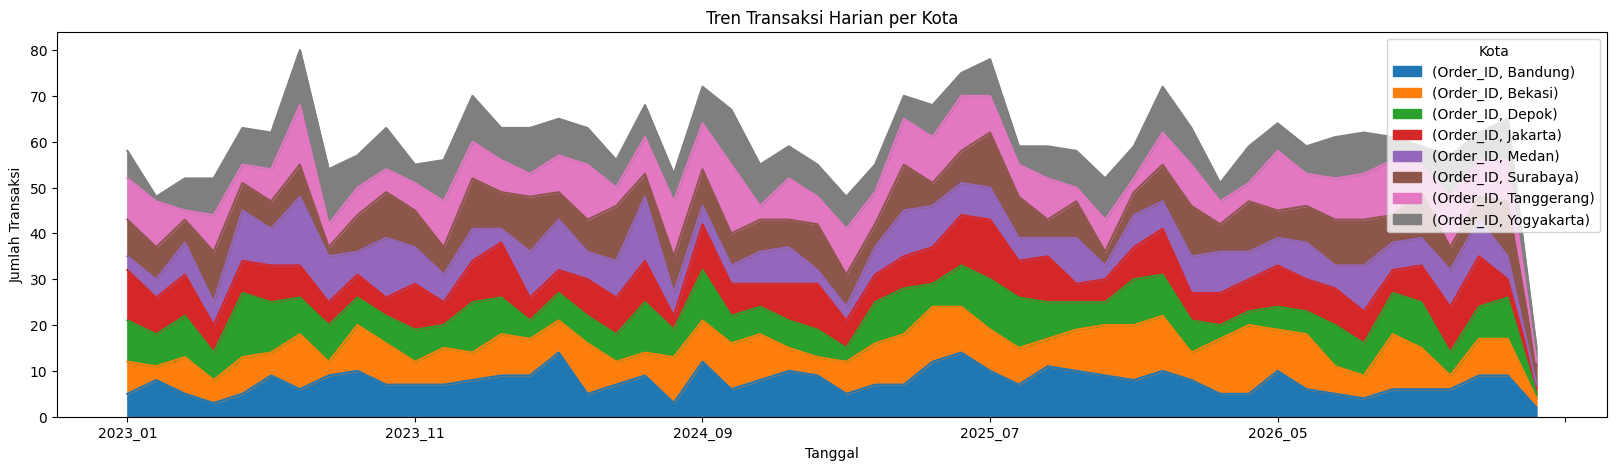

In [11]:
df6 = df.groupby(["Tahun_Bulan1", "Kota"])[["Order_ID"]].count().sort_values(by="Tahun_Bulan1").unstack()

df6.plot(kind="area", figsize=(20,5))
plt.title("Tren Transaksi Bulanan per Kota")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Transaksi")
plt.legend(title="Kota")
plt.show()


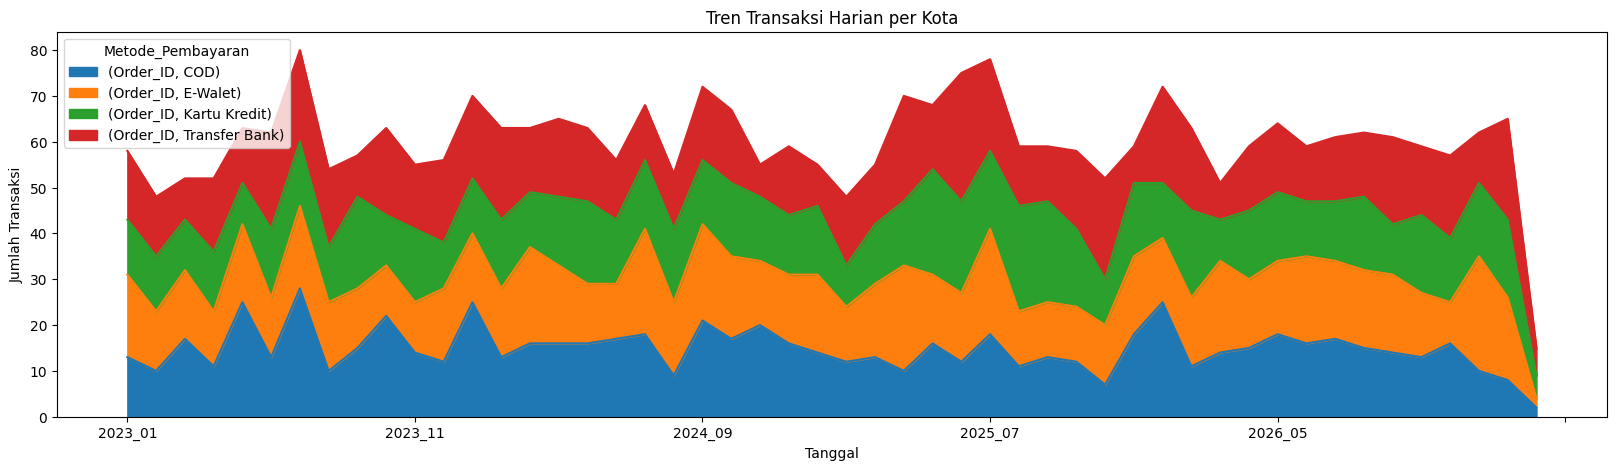

In [12]:
df7 = df.groupby(["Tahun_Bulan1", "Metode_Pembayaran"])[["Order_ID"]].count().sort_values(by="Tahun_Bulan1").unstack()

df7.plot(kind="area", figsize=(20,5))
plt.title("Tren Transaksi Bulanan per Metode Bayar")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Transaksi")
plt.legend(title="Metode_Pembayaran")
plt.show()


# **ANALISIS BERDASARKAN WAKTU**


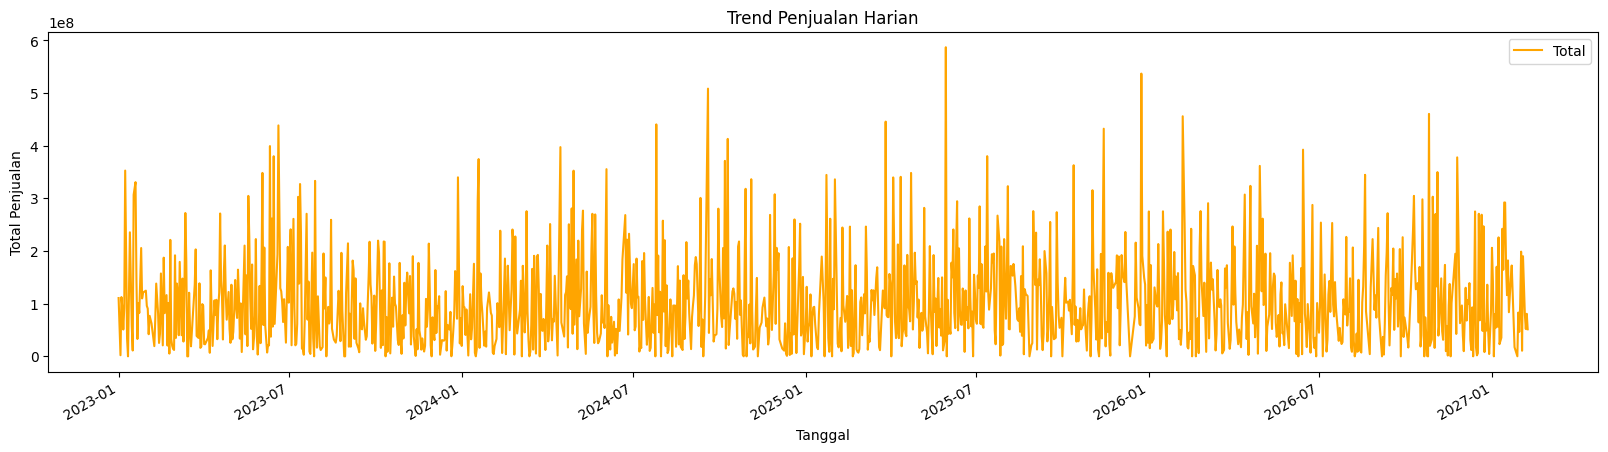

In [26]:
df8 = df.groupby("Tanggal")[["Total"]].sum().sort_values(by= "Tanggal",ascending=True)

df8.plot(kind="line", figsize=(20,5), color="Orange")
plt.title("Trend Penjualan Harian")
plt.xlabel("Tanggal")
plt.ylabel("Total Penjualan")
plt.show()

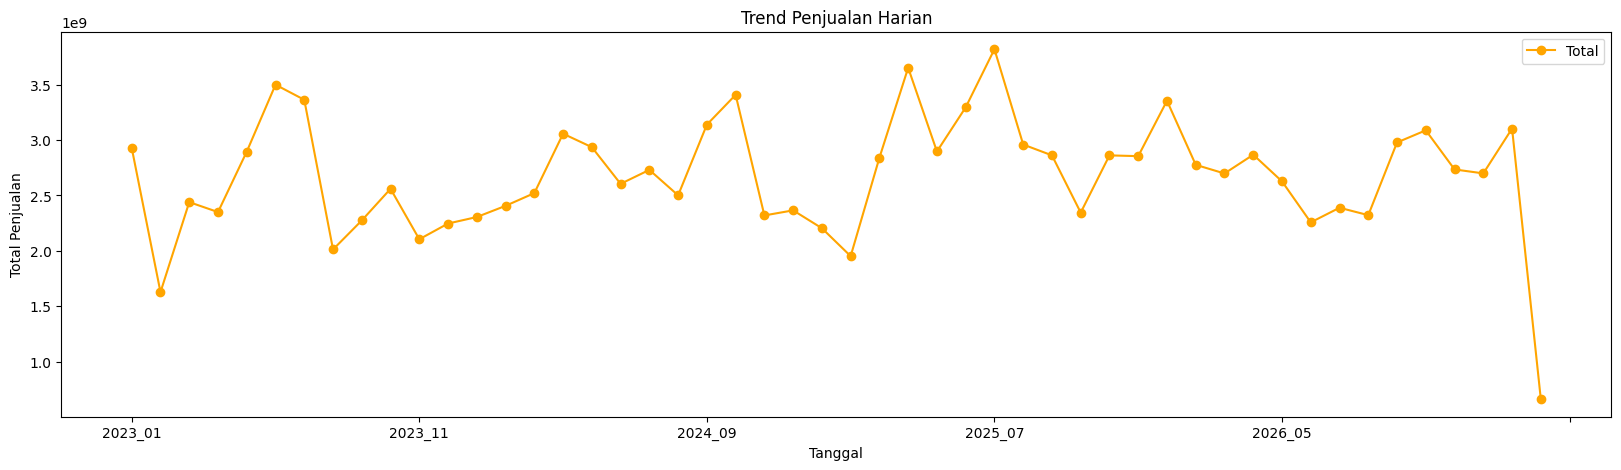

In [27]:
df9 = df.groupby("Tahun_Bulan1")[["Total"]].sum().sort_values(by= "Tahun_Bulan1",ascending=True)

df9.plot(kind="line", figsize=(20,5), color="Orange", marker="o")
plt.title("Trend Penjualan Harian")
plt.xlabel("Tanggal")
plt.ylabel("Total Penjualan")
plt.show()

# **ANALISIS KEPUASAN PELANGGAN**

In [29]:
df["Rating"].mean()

np.float64(3.0126666666666666)

In [30]:
df.groupby("Produk")["Rating"].mean().sort_values(ascending=False)

,Rating
Produk,
Monitor,3.122744
Webcam,3.090592
Mouse,3.065831
Keybord,3.051724
Headset,3.041812
Router,3.012346
Flashdisk,3.008798
Spiker,2.924188
Printer,2.916399


In [31]:
df.groupby("Kategori")["Rating"].mean().sort_values(ascending=False)

,Rating
Kategori,
Elektronik,3.039773
Aksesoris,3.006263
Perangkat Jaringan,2.989858


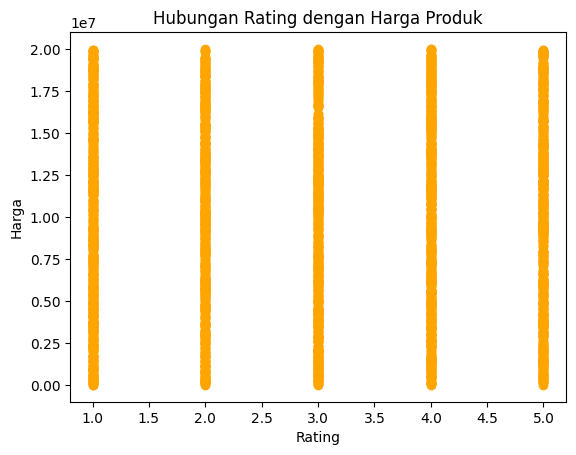

In [35]:
plt.scatter(df["Rating"], df["Harga"], color="Orange")
plt.title("Hubungan Rating dengan Harga Produk")
plt.xlabel("Rating")
plt.ylabel("Harga")
plt.show()

In [36]:
df.groupby("Kota")["Rating"].mean().sort_values(ascending=False)

,Rating
Kota,
Jakarta,3.148649
Yogyakarta,3.131507
Surabaya,3.023810
Bekasi,3.002469
Bandung,2.979003
Depok,2.978082
Tanggerang,2.969152
Medan,2.864553
